# Credit Card Fraud Detection

This Credit Card Fraud Detection project seeks to accurately identify fraudulent transactions in a highly skewed dataset in which only a small percentage of transactions are fraudulent. The dataset contains approximately 284,000 credit card transactions with anonymised attributes, enabling for detailed research without privacy concerns.

The project includes numerous important procedures for preprocessing, analyzing, and modeling data in order to efficiently detect fraud. Data cleansing, feature scaling, and class imbalance resolution using techniques such as SMOTE and class weight adjustments are all critical aspects. A variety of models will be evaluated, with decision trees. Performance will be measured using measures such as precision, recall, and F1-score, with an emphasis on reducing false positives while increasing fraud detection accuracy.


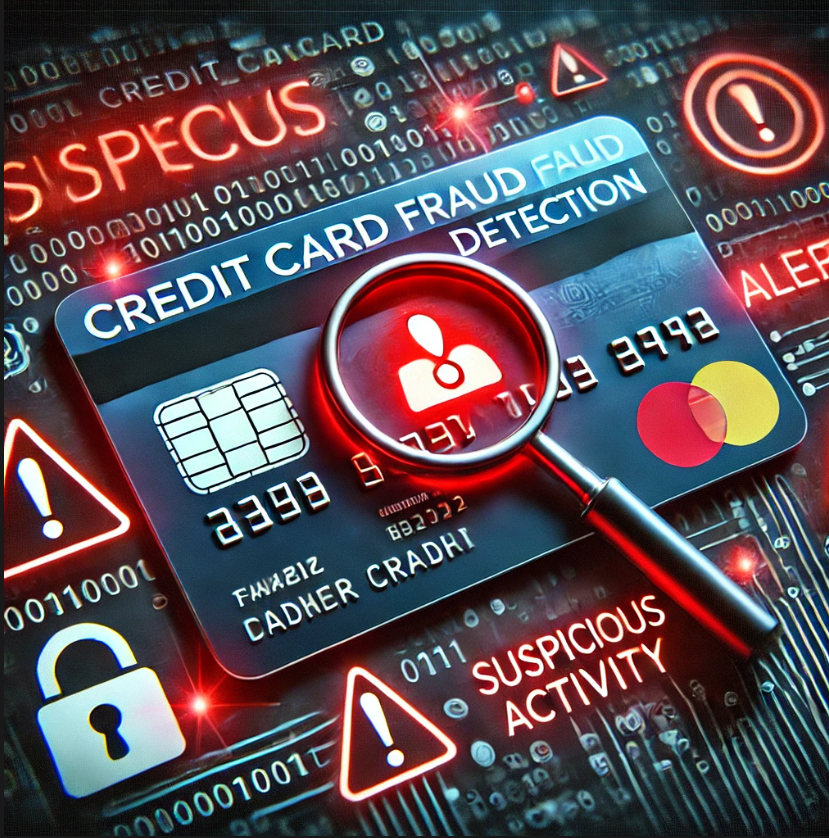

In [6]:
from IPython.display import Image, display

# Corrected file path
image_path = r"C:\Users\saire\OneDrive\Pictures\Screenshots\Screenshot 2025-01-30 181202.png"

# Display the image
display(Image(filename=image_path))


In [2]:
import pandas

In [3]:
df = pandas.read_csv('creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

# Data Preprocessing

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
df.duplicated().sum()

1081

In [12]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [13]:
df = df.drop_duplicates()

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Correlation matrix

In [101]:
c = df.corr()
c

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<Axes: >

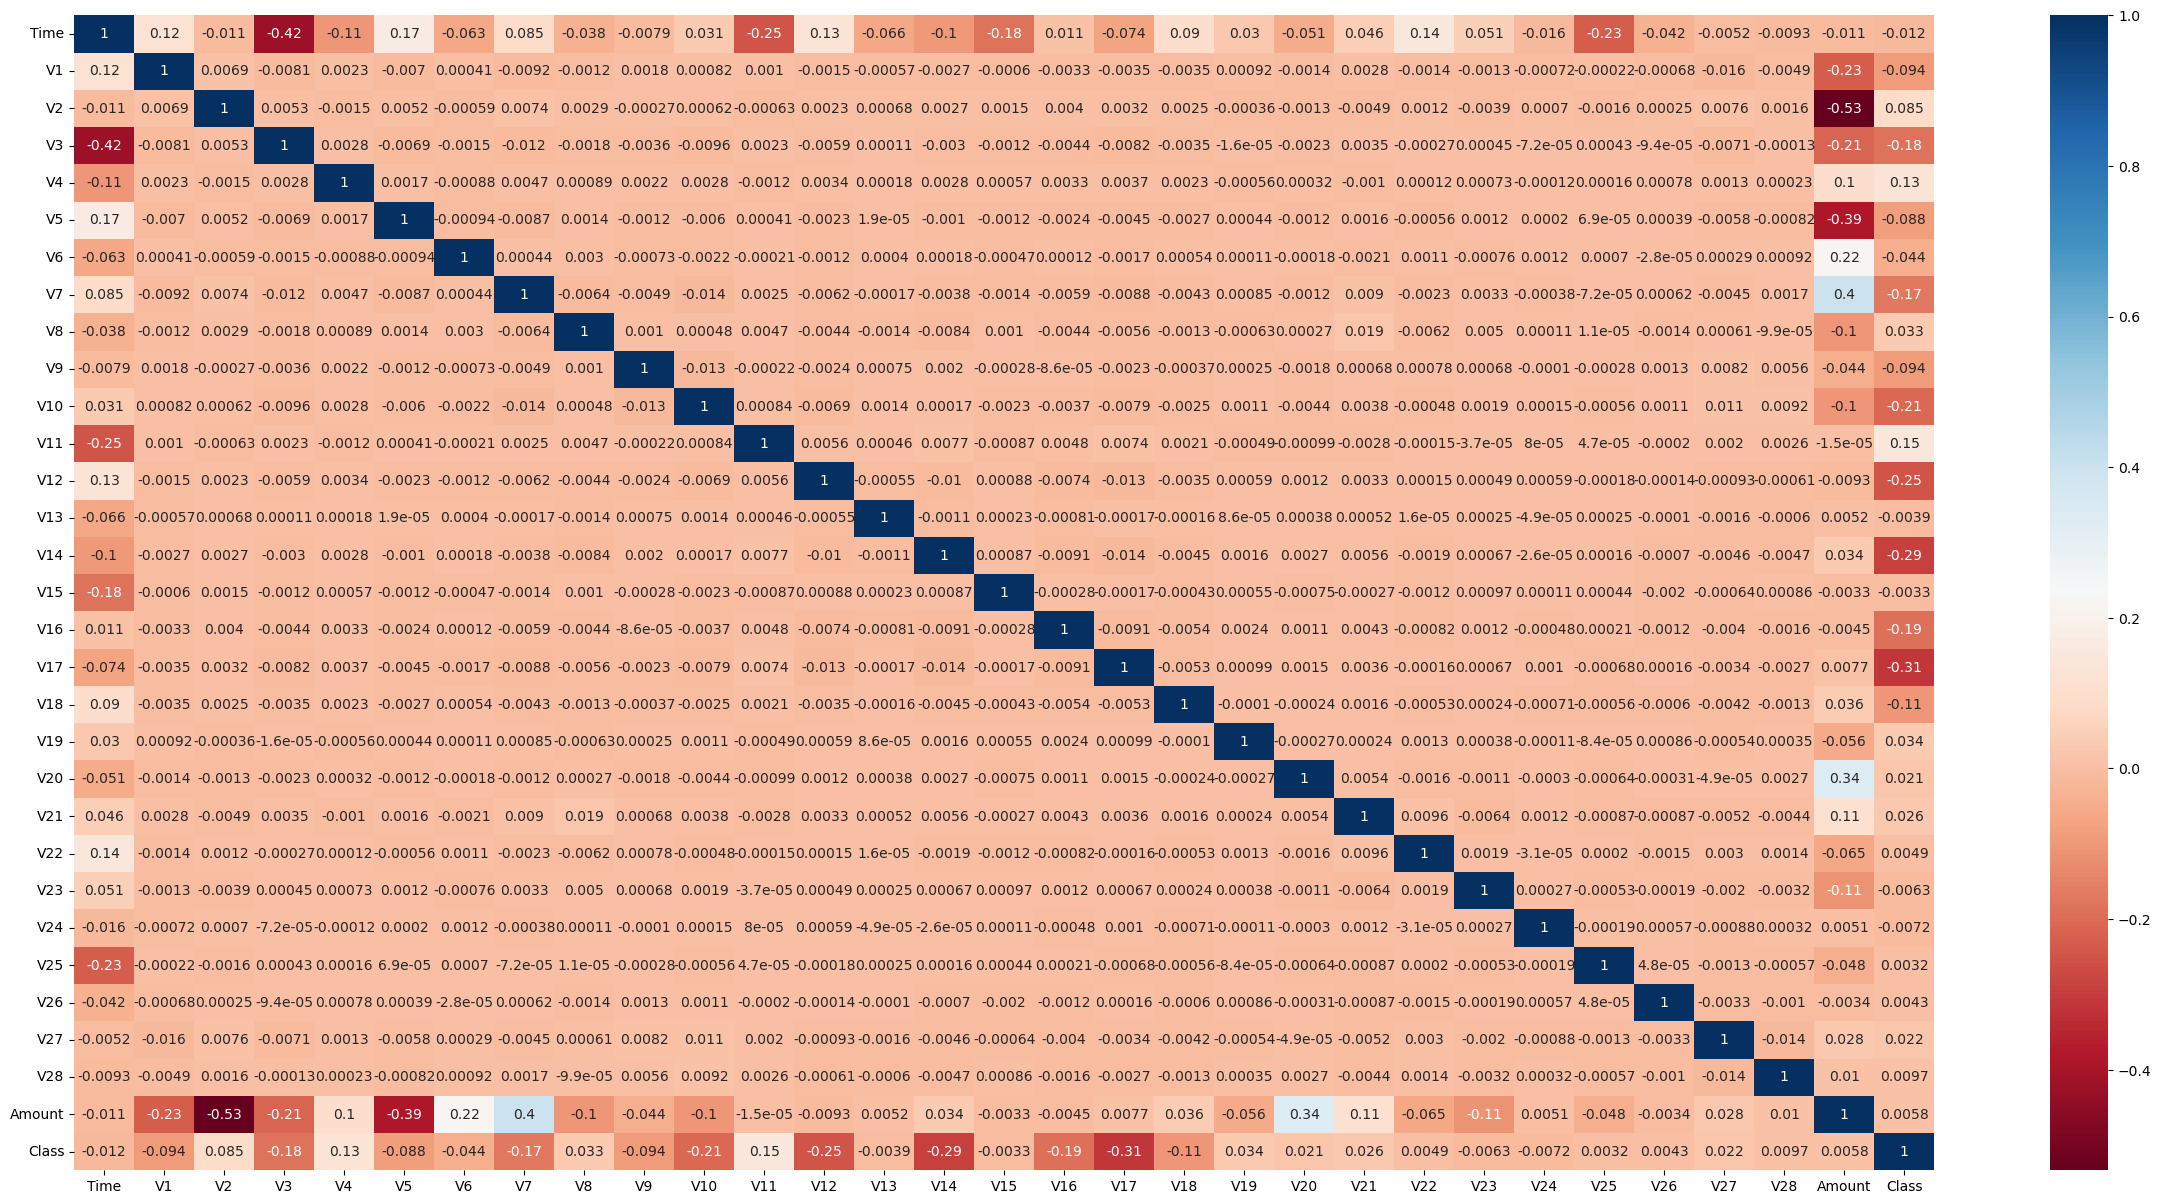

In [15]:
import matplotlib.pyplot as plt
import  seaborn
plt.figure(figsize=(30, 15))
seaborn.heatmap(c, annot=True, cmap='RdBu')

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [65]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

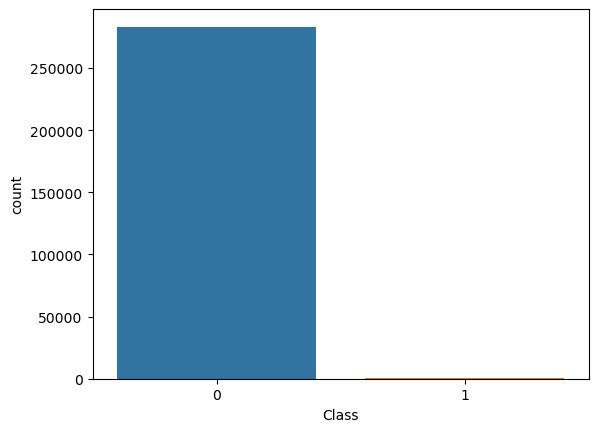

In [71]:
import seaborn
seaborn.countplot(x = 'Class', data=df)

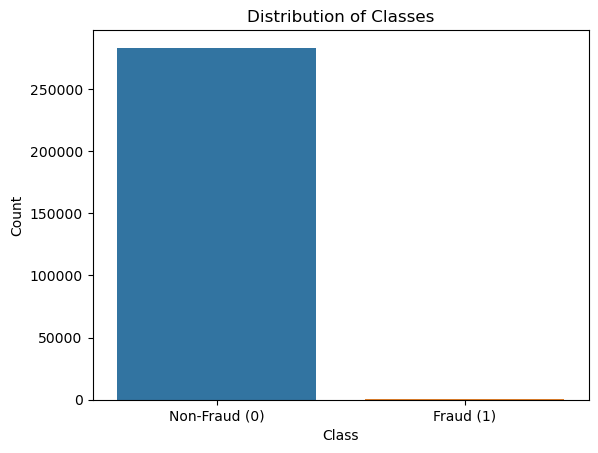

In [72]:
import seaborn as sns  # Seaborn is typically imported as sns
import matplotlib.pyplot as plt

# Create a countplot for the 'Class' column
sns.countplot(x='Class', data=df)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks([0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])  # Optional for readability
plt.show()


In [66]:
import warnings
warnings.filterwarnings('ignore')

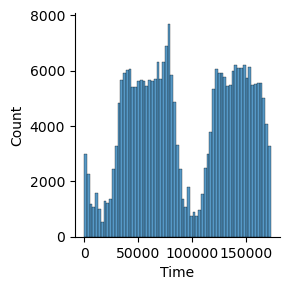

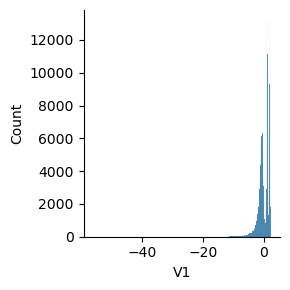

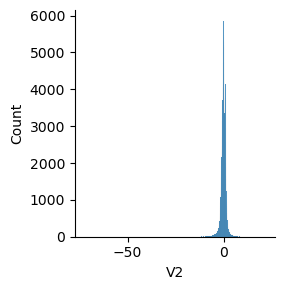

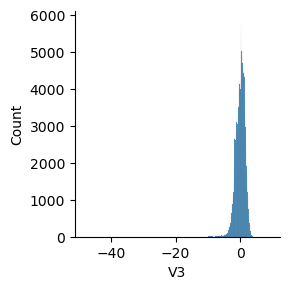

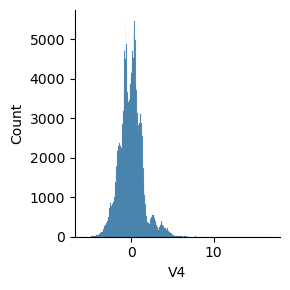

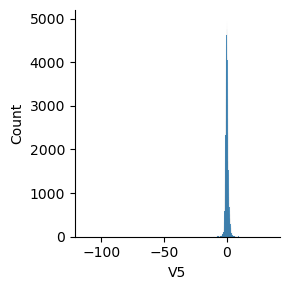

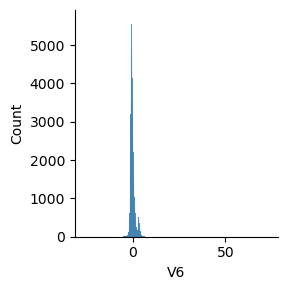

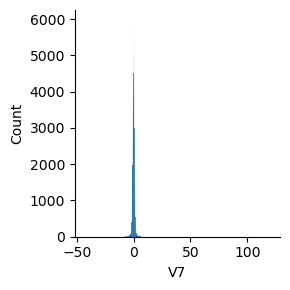

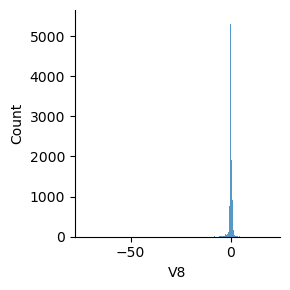

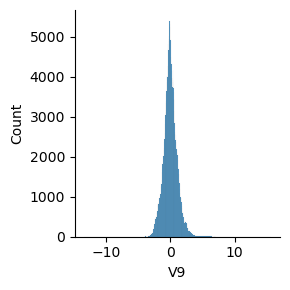

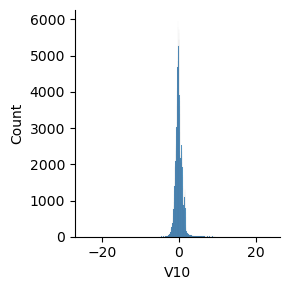

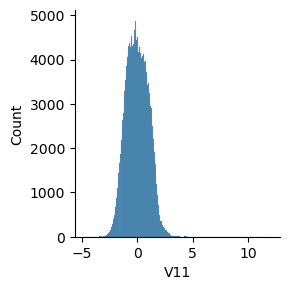

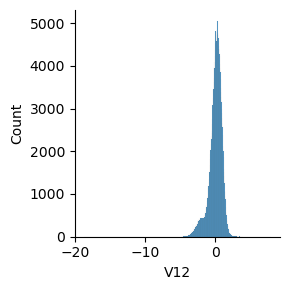

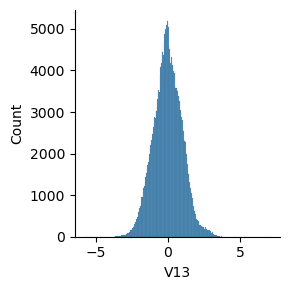

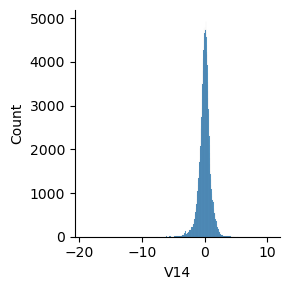

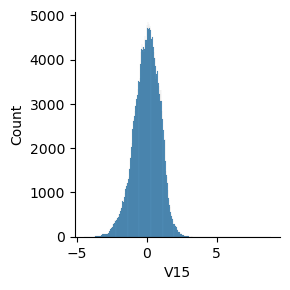

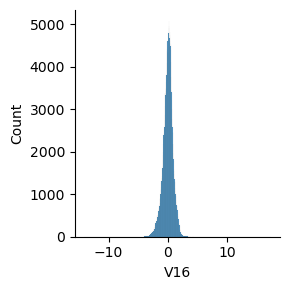

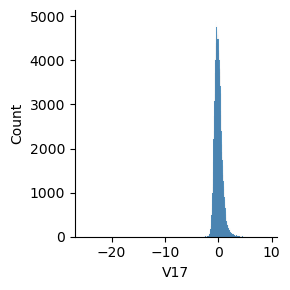

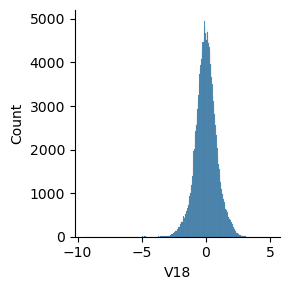

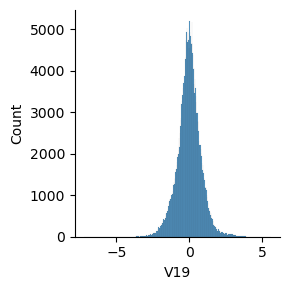

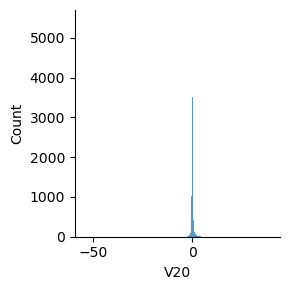

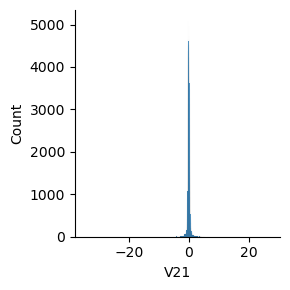

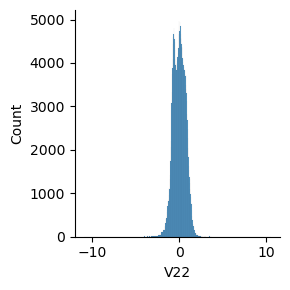

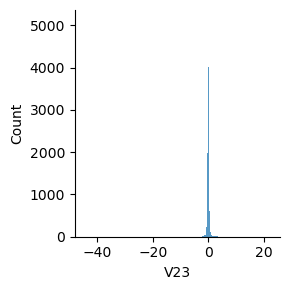

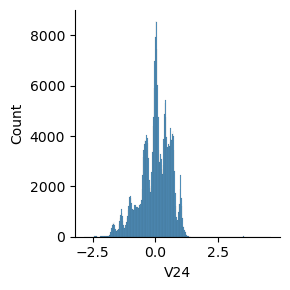

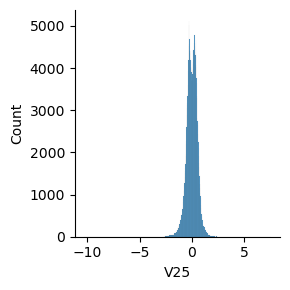

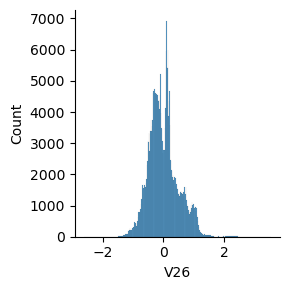

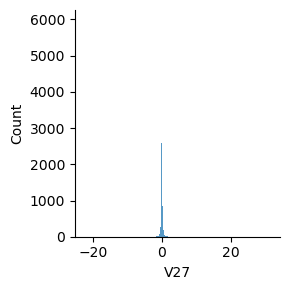

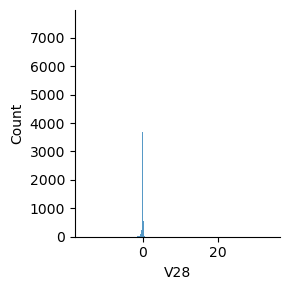

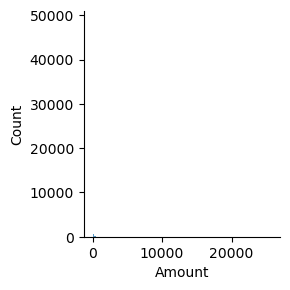

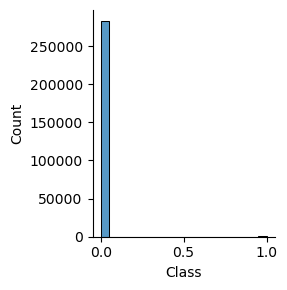

In [19]:
columns =['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class']
for col in columns:
     seaborn.displot(data=df, x=col, kind='hist', height=3)

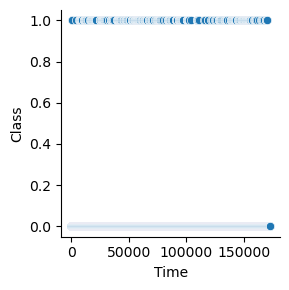

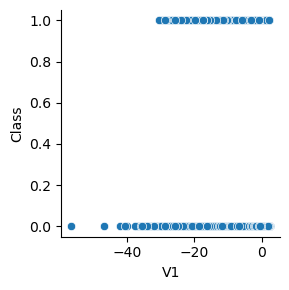

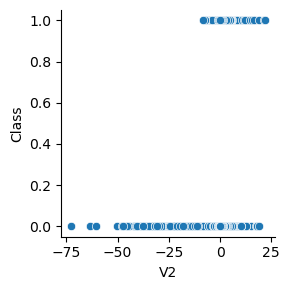

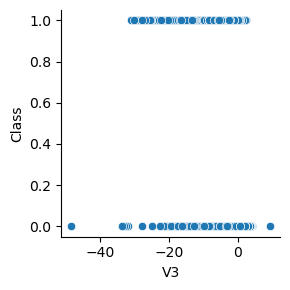

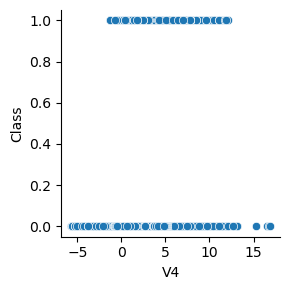

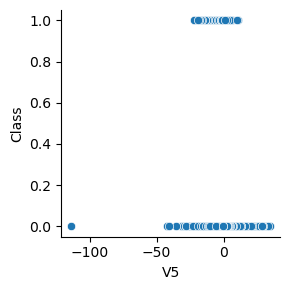

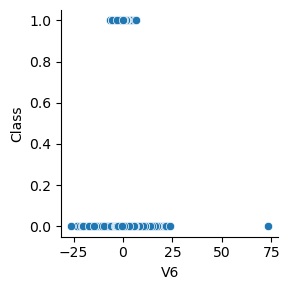

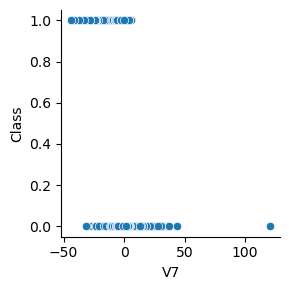

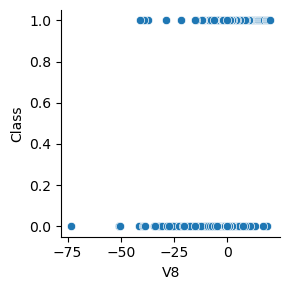

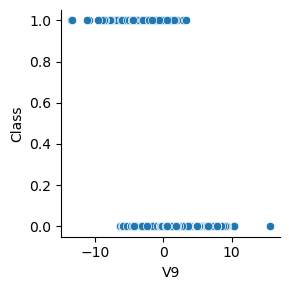

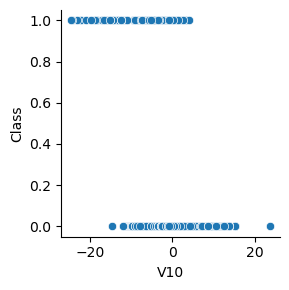

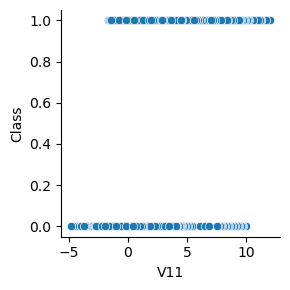

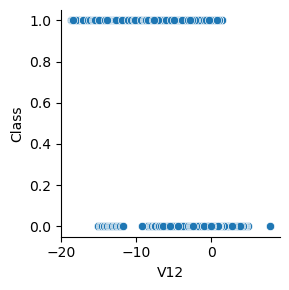

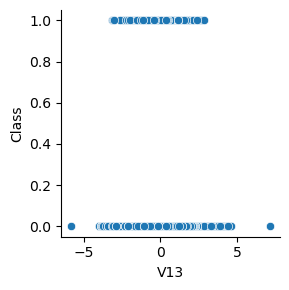

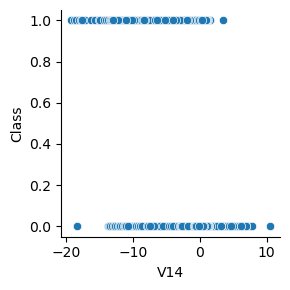

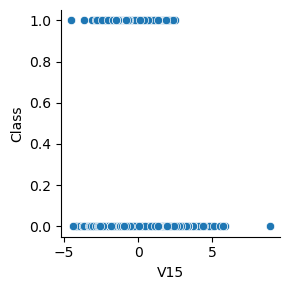

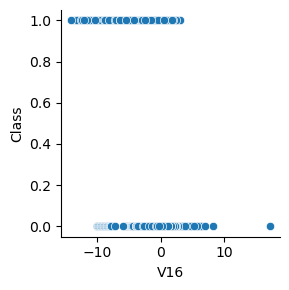

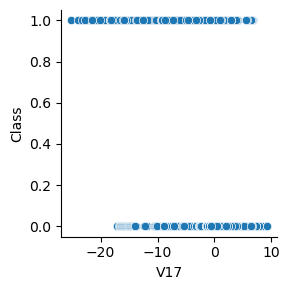

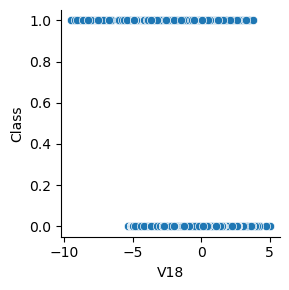

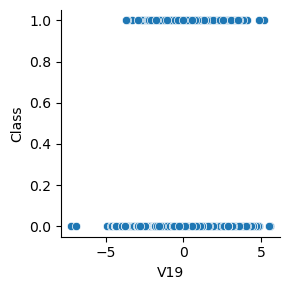

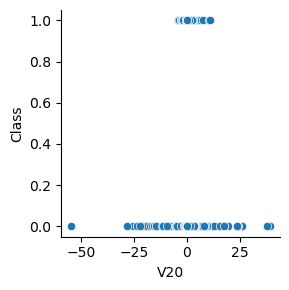

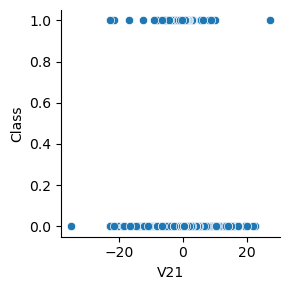

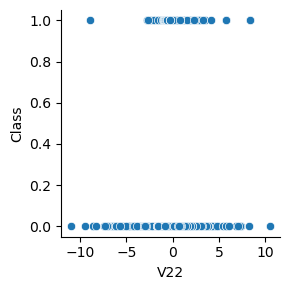

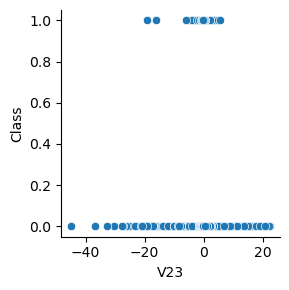

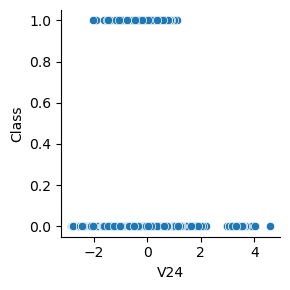

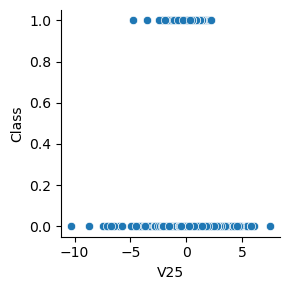

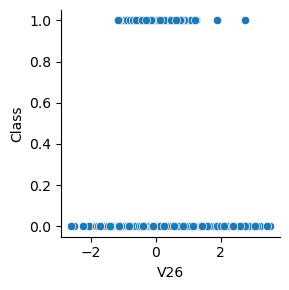

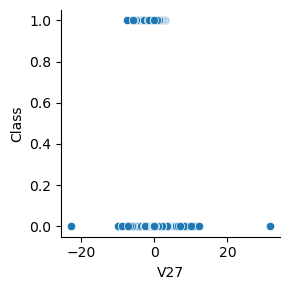

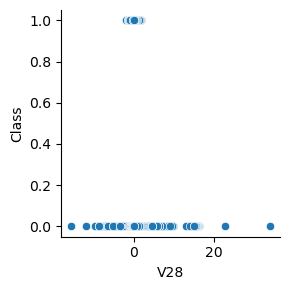

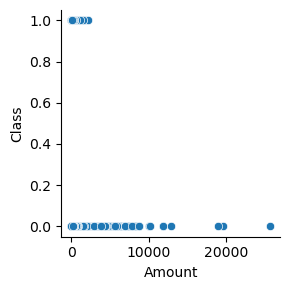

In [21]:
columns =['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
for col in columns:
     seaborn.relplot(data=df, x=col,y='Class', height=3)

In [22]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
model =StandardScaler()

In [18]:
model

StandardScaler()

In [19]:
df[['Time', 'Amount']] = model.fit_transform(df[['Time', 'Amount']])

In [20]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [21]:
df['Amount'] = model.fit_transform(df[['Amount']])
df['Time'] = model.fit_transform(df[['Time']])

In [22]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


# SMOTE

SMOTE stands for Synthetic Minority Over-sampling Technique. It's a popular technique used in machine learning to address class imbalance by generating synthetic data points for the minority class. SMOTE is particularly useful when dealing with classification tasks where one class (often the minority class) has far fewer samples than the other.



In [23]:
X = df.drop(['Class'],axis=1) #Features


In [24]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


In [25]:
y= df['Class']

In [26]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [27]:
pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
X_resambole,y_resambole = SMOTE().fit_resample(X,y)

In [34]:
X_resambole.shape

(566506, 30)

In [121]:
y_resambole.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_resambole, y_resambole, test_size=0.2, random_state=42)

In [124]:
X_train.shape

(453204, 30)

In [125]:
y_train.shape


(453204,)

In [126]:
X_test.shape


(113302, 30)

In [127]:
y_test.shape

(113302,)

In [128]:
model = DecisionTreeClassifier()

In [129]:
model

DecisionTreeClassifier()

In [130]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
model.score(X_test,y_test)

0.9981730243067201

In [132]:
y_pred=model.predict(X_test)

In [133]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [134]:
y_test

554816    1
19821     0
184234    0
503641    1
261118    0
         ..
194785    0
357857    1
485557    1
258811    0
71821     0
Name: Class, Length: 113302, dtype: int64

In [135]:
accuracy_score(y_test,y_pred)

0.9981730243067201

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [243]:
DT = confusion_matrix(y_test,y_pred)
DT

array([[56320,   143],
       [   64, 56775]], dtype=int64)

              Predicted
              1    0
          1   TP   FN
          0   FP   TN


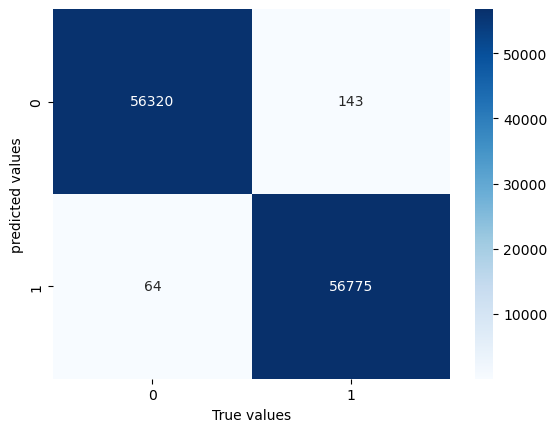

In [248]:
import seaborn
seaborn.heatmap(DT,annot=True,fmt='d',cmap='Blues')
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.show()

In [142]:
(model.feature_importances_)

array([7.36962023e-03, 6.43916248e-03, 2.07674480e-03, 9.93137510e-03,
       6.68151564e-02, 3.34000505e-03, 5.49153409e-03, 7.53685387e-03,
       1.86788812e-02, 5.99549995e-03, 1.36024565e-02, 7.56004756e-03,
       1.42396533e-02, 1.33940934e-02, 7.32868604e-01, 1.08180350e-02,
       3.40703035e-03, 7.01985484e-03, 5.59443499e-03, 4.80534417e-03,
       3.03487752e-03, 4.64310458e-03, 3.62719431e-03, 7.51313314e-03,
       3.12572711e-03, 3.65045780e-03, 5.88443428e-03, 4.28448202e-04,
       1.38010912e-03, 1.97281265e-02])

In [143]:
import matplotlib.pyplot as plt

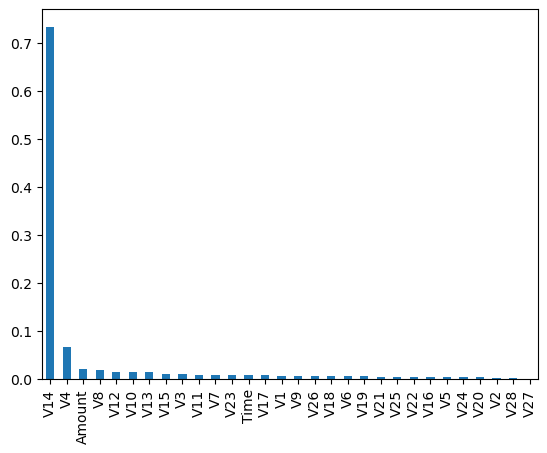

In [151]:
# plot _graph of feature importance for better visualization
feat_importances = pandas.Series(model.feature_importances_, index=X.columns)
feat_importances .nlargest(30).plot(kind='bar')
plt.show()


In [154]:
feat_importances

Time      0.007370
V1        0.006439
V2        0.002077
V3        0.009931
V4        0.066815
V5        0.003340
V6        0.005492
V7        0.007537
V8        0.018679
V9        0.005995
V10       0.013602
V11       0.007560
V12       0.014240
V13       0.013394
V14       0.732869
V15       0.010818
V16       0.003407
V17       0.007020
V18       0.005594
V19       0.004805
V20       0.003035
V21       0.004643
V22       0.003627
V23       0.007513
V24       0.003126
V25       0.003650
V26       0.005884
V27       0.000428
V28       0.001380
Amount    0.019728
dtype: float64

# Roc_Auc_Score

roc_auc_score (Receiver Operating Characteristic - Area Under the Curve) is a performance metric used for classification models, especially for imbalanced datasets. It measures the ability of a model to distinguish between classes.

A higher AUC (closer to 1.0) means better classification performance.

Formula for AUC-ROC:

The AUC (Area Under the Curve) score is calculated from the ROC curve, which plots:

True Positive Rate (TPR) = Sensitivity = Recall

False Positive Rate (FPR)

TPR = TP/(TP+FN)

FPR = FP/(FP+FN)

AUC represents the area under this curve.



 Explanation
    
✅ predict_proba()[:, 1] → Extracts the probabilities of the positive class.

✅ roc_curve(y_test, y_scores) → Computes FPR, TPR, and thresholds.

✅ roc_auc_score(y_test, y_scores) → Computes the AUC value.

✅ ROC Plot → Shows how well the model separates classes.



In [226]:
y_probs = model.predict_proba(X_test)

In [227]:
y_probs[:5]


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [228]:

len(y_probs)

113302

In [229]:
y_probs_positive = y_probs[:,1]

In [230]:
y_probs_positive[:5]

array([1., 0., 0., 1., 0.])

In [231]:
from sklearn.metrics import roc_auc_score, roc_curve


In [232]:
fbr,tpr,thresh = roc_curve(y_test,y_probs_positive)

In [233]:
fbr,tpr,thresh

(array([0.        , 0.00253263, 1.        ]),
 array([0.        , 0.99887401, 1.        ]),
 array([inf,  1.,  0.]))

In [234]:
auc_score = roc_auc_score(y_test, y_probs_positive)
auc_score

0.9981706902863535

# Interpreting AUC Scores

AUC Score  	 Interpretation

0.5  	     No discrimination (random model)

0.6 - 0.7	Poor model

0.7 - 0.8	Fair model

0.8 - 0.9	Good model

0.9 - 1.0	Excellent model

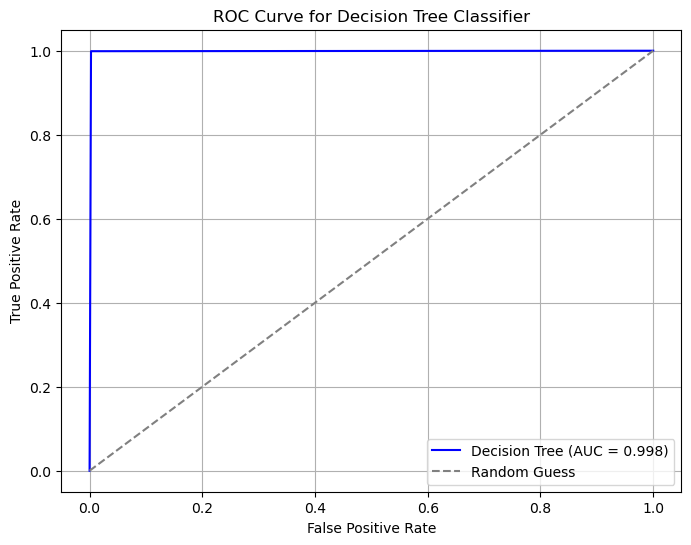

In [235]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray",label='Random Guess')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.grid()

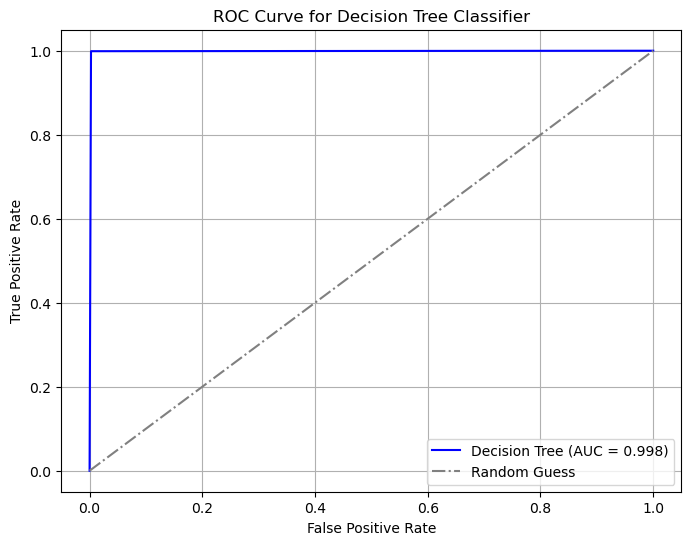

In [242]:
# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # Get probability scores for class 1

# Compute ROC-AUC score
auc_score = roc_auc_score(y_test, y_scores)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], linestyle="-.", color="gray",label='Random Guess')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.grid()

# Deployment

Save the model: You can save the trained model using joblib for later use.

# Model = Decision Tree

In [250]:
import joblib

In [269]:
# Step 2: Save the trained model using joblib
joblib.dump(model, 'Credit_card_model.pkl')

['Credit_card_model.pkl']

In [270]:
# Step 3: Load the model from file
loaded_model = joblib.load('Credit_card_model.pkl')


In [271]:
# Step 4: Use the loaded model for prediction
y_pred = loaded_model.predict(X_test)


In [272]:
# Step 5: Evaluate the loaded model
accuracy_score(y_test,y_pred)

0.9981730243067201

In [275]:
if pred[0] == 0:
  print('No Fraud')
else:
  print('Fraud')

No Fraud


In [300]:
X_test.iloc[0]

Time      1.320220
V1       -0.377363
V2        3.141282
V3       -3.156647
V4        5.825747
V5        0.861850
V6       -0.519249
V7       -0.567351
V8        0.290433
V9       -3.336371
V10      -2.227606
V11       0.827912
V12      -3.518761
V13       0.241040
V14      -5.937108
V15       0.330963
V16      -1.162632
V17       0.089008
V18       0.283641
V19       1.223523
V20       0.565000
V21       0.027040
V22      -0.381393
V23      -0.230417
V24      -0.971962
V25       0.360680
V26       0.569522
V27       0.274539
V28       0.164163
Amount   -0.188217
Name: 554816, dtype: float64

In [304]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
554816,1.320220,-0.377363,3.141282,-3.156647,5.825747,0.861850,-0.519249,-0.567351,0.290433,-3.336371,...,0.565000,0.027040,-0.381393,-0.230417,-0.971962,0.360680,0.569522,0.274539,0.164163,-0.188217
19821,-1.351743,-0.923736,1.108088,1.560499,-0.268841,0.075925,-0.230605,0.703012,0.024225,-0.071223,...,0.353115,-0.259255,-0.387702,0.007894,0.186998,-0.262051,0.053898,0.331941,0.015959,-0.281482
184234,0.666139,-1.431701,-1.397938,-1.991814,-2.281973,3.728501,2.114475,-0.799982,1.200862,-1.737078,...,-0.124045,-0.129716,-0.739275,-0.161992,0.695171,0.388090,0.075462,-0.123091,-0.376603,-0.349533
503641,-1.438787,-19.642383,11.993828,-22.290372,6.109089,-15.008656,-4.332411,-15.548052,13.137863,-3.982396,...,1.579777,1.749096,-1.392690,-0.801288,0.120528,1.331687,-0.224911,1.604839,0.479186,0.045996
261118,1.379267,-1.330448,1.119757,-2.572612,1.622074,0.970933,-1.086979,0.505613,0.616914,-0.848251,...,-0.206425,0.032702,0.070120,-0.262940,-0.588721,0.233772,-0.384721,-0.089859,-0.319339,-0.184396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194785,0.763947,-1.713524,-1.454474,-2.085923,1.176238,-1.008929,0.349107,5.266096,-0.825448,-1.659353,...,2.067196,1.057223,1.422867,1.937434,1.042086,0.637725,-0.322987,-0.178539,0.270746,3.604357
357857,0.326560,-2.349117,1.913756,-5.327948,1.914200,-3.484363,1.059085,-0.842158,1.445660,-1.945766,...,0.222493,0.832641,0.508053,0.735477,-0.612091,-1.169725,-0.101094,0.980835,0.342759,2.157689
485557,-1.817123,0.343164,3.769173,-5.762258,6.082691,1.676144,-2.528089,-0.751070,0.061557,-2.302511,...,0.317348,0.154743,-0.638378,-0.568898,-0.629156,1.458291,0.545959,0.529791,0.406547,-0.349333
258811,1.357490,2.013611,-0.267212,-0.736766,0.017024,0.151220,0.524999,-0.530068,0.125899,0.847492,...,-0.064013,-0.174973,-0.351407,0.270087,-0.155116,-0.273752,-0.626453,0.034687,-0.039486,-0.323415


In [294]:
X_test.iloc[1]

Time     -1.351743
V1       -0.923736
V2        1.108088
V3        1.560499
V4       -0.268841
V5        0.075925
V6       -0.230605
V7        0.703012
V8        0.024225
V9       -0.071223
V10       0.652308
V11       1.763739
V12       0.475183
V13      -0.590104
V14       0.119950
V15       0.502051
V16      -0.052710
V17      -0.389159
V18      -0.376149
V19      -0.183376
V20       0.353115
V21      -0.259255
V22      -0.387702
V23       0.007894
V24       0.186998
V25      -0.262051
V26       0.053898
V27       0.331941
V28       0.015959
Amount   -0.281482
Name: 19821, dtype: float64

In [299]:
y_pred[1]

0

In [295]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [309]:
y_test

554816    1
19821     0
184234    0
503641    1
261118    0
         ..
194785    0
357857    1
485557    1
258811    0
71821     0
Name: Class, Length: 113302, dtype: int64

In [280]:
data = [[-1.351743, -0.923736,       1.108088,      1.560499
,      -0.268841
,       0.075925
,      -0.230605
,       0.703012
,       0.024225
,       -0.071223
,      0.652308
,      1.763739
,      0.475183
,     -0.590104
,       0.119950
,       0.502051
,     -0.052710
,      -0.389159
,      -0.376149
,      -0.183376
,       0.353115
,     -0.259255
,     -0.387702
,      0.007894
,      0.186998
,     -0.262051
,      0.053898
,      0.331941
,       0.015959
,   -0.281482]]

In [281]:
pred = loaded_model.predict(data)

In [282]:
pred

array([0], dtype=int64)

In [308]:
X_test.iloc[0]

Time      1.320220
V1       -0.377363
V2        3.141282
V3       -3.156647
V4        5.825747
V5        0.861850
V6       -0.519249
V7       -0.567351
V8        0.290433
V9       -3.336371
V10      -2.227606
V11       0.827912
V12      -3.518761
V13       0.241040
V14      -5.937108
V15       0.330963
V16      -1.162632
V17       0.089008
V18       0.283641
V19       1.223523
V20       0.565000
V21       0.027040
V22      -0.381393
V23      -0.230417
V24      -0.971962
V25       0.360680
V26       0.569522
V27       0.274539
V28       0.164163
Amount   -0.188217
Name: 554816, dtype: float64

In [301]:
U =[[     1.320220
,      -0.377363
,        3.141282
,      -3.156647
,        5.825747
,       0.861850
,      -0.519249
,      -0.567351
,        0.290433
,       -3.336371
,     -2.227606
,      0.827912
,     -3.518761
,       0.241040
,     -5.937108
,       0.330963
,     -1.162632
,      0.089008
,       0.283641
,       1.223523
,       0.565000
,       0.027040
,      -0.381393
,      -0.230417
,      -0.971962
,      0.360680
,      0.569522
,      0.274539
,      0.164163
,   -0.188217]]


In [302]:
pred = loaded_model.predict(U)

In [303]:
pred

array([1], dtype=int64)

In [306]:
y_pred[0]

1

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib
import gradio as gr

# Load dataset
df = pd.read_csv('creditcard.csv')
# Remove missing values in the Dataset
df.isnull().sum() 
df=df.dropna()
# Remove duplicate rows
df = df.drop_duplicates()

# Use all features except 'Class'
X = df.drop(['Class'], axis=1)
y = df['Class']

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])
# Balance classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'decision_tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Test model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Define prediction function for Gradio
def predict_fraud(*features):
    # Convert input to DataFrame
    features = [float(x) for x in features]
    features_df = pd.DataFrame([features], columns=X.columns)
    features_df[['Time', 'Amount']] = scaler.transform(features_df[['Time', 'Amount']])
    prediction = model.predict(features_df)
    return 'Fraud' if prediction[0] == 1 else 'Not Fraud'

# Create Gradio Interface
feature_names = X.columns
interface = gr.Interface(
    fn=predict_fraud,
    inputs=[gr.Number(label=name) for name in feature_names],
    outputs="text",
    title="Credit Card Fraud Detection",
    description="Provide transaction features to predict if it's fraud or not."
)

# Launch the app
interface.launch()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
